# IS 362 Final Project 

In this final project I seek to utilize the concepts that were presented in class.  I will make use of the the Titanic data set.  The Titanic Data set can be found here: [Titanic Dataset](http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets).  This dataset was taken from Vanderbuilt University's Department of Biostatisitcs.  

The project seeks to work through various stats about the Titanic passengers.  It will show the distribution of the passengers among classes and a few other areas like the average age of the passngers broken down by class.  This will lead to a model being created to try to predict whether a passenger was going to survice based on a few criteria.  Then a conclusion will be made to see if this is a feasible way to predict the survivabilty of the passenger.  

## A Few Simple Statistics About the passengers

How many passengers were recorded on the ship's passenger list?  The cod below does this simply.

In [147]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.width', 2100)
warnings.filterwarnings('ignore')

filepath_titanic = 'titanic3.csv'  # path to the CSV containing the Titanic data

#Read the data into a dataframe
titanic_frame = pd.read_csv(filepath_titanic, sep=',')

print (len(titanic_frame))



1309


The number 1309 represents the number of passengers that are currently in the CSV.  We need to keep this in mind as we work through this project.  All calcuations need to add up to this number where relavent.  Let's look at the distribtuion of males and females in general.  The code below will display the break-up of the sexes that were passengers on the Titanic.

In [148]:
men_women = titanic_frame.groupby('sex').size()
print (men_women)

sex
female    466
male      843
dtype: int64


If we add these numbers we get the right answer for the total number entries that are on the CSV.  A graph of the passengers on the Titanic can be seen below.

AxesSubplot(0.125,0.125;0.775x0.755)


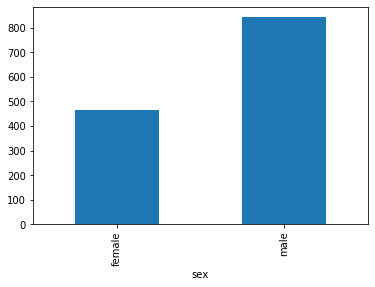

In [149]:
print(men_women.plot.bar())

As we can see that there are considerably more men as passengers of the Titanic.  We can even look at the distribution of the passengers based on the classes that were on the Titanic. 

### The Distribution of the Sexes Among Titanic Passengers

The passengers were broken up among three basic classes: First (1), Second (2) and Third (3).  To see how the classes were broken up based on a passengers sex we can use the following code that produces a graph and some simple analysis.

In [150]:
men_women_by_class = titanic_frame.groupby(['pclass', 'sex']).size()
print (men_women_by_class)

pclass  sex   
1       female    144
        male      179
2       female    106
        male      171
3       female    216
        male      493
dtype: int64


A graph that helps illustrate how the sexes are distributed among the passenger classes is accomplished with the following code.  

AxesSubplot(0.125,0.125;0.775x0.755)


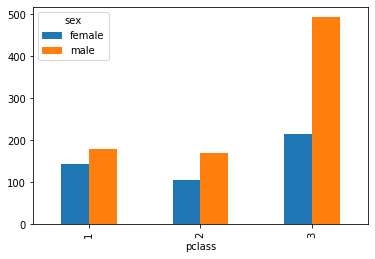

In [151]:
men_women_class = titanic_frame.groupby(['pclass','sex'])['sex'].agg(np.size)

print (men_women_class.unstack().plot.bar())

Now that we have found out about the distibution of the sexes of the passengers among the various passenger classes.  Can we find out some more statistics about the passengers.  How about what is the average age of the passengers.  

### What is the average age of the passengers?

The average age of a passenger on the Titanic was:

In [152]:
print(titanic_frame.groupby('sex').age.mean()) 

sex
female    28.687088
male      30.585228
Name: age, dtype: float64


Applying the same technique that we used above we can get the average age from each class.  In the output that is given we can see that the first class passengers have the higher overall age.  This is not that surprising since most in the first class suites are well into their careers and need to have the means to afford the accommadations.

In [153]:
#Average age by class
print(titanic_frame.groupby('pclass').age.mean())  


pclass
1    39.159930
2    29.506705
3    24.816367
Name: age, dtype: float64


### Can we find the indivual(s) who are the youngest?

In this section I will seek to find the youngest passenger on the Titanic.  More than likely it will be an infant since based on personal knowledge there were a lot of children and infants on the Titanic.

In [154]:
#Finding the youngest passenger on the Titanic
youngest_passenger = titanic_frame[titanic_frame.age == titanic_frame.age.min()]
print (youngest_passenger[['pclass', 'name', 'age']])

     pclass                                     name   age
763       3  Dean, Miss. Elizabeth Gladys "Millvina"  0.17


As you can see by the output the age of the individual is an infant. Who is the oldest passenger on the Titanic?

### Can we find the oldest passenger on the Titanic?

Using the same approach for finding the youngest passenger we can find the oldest passenger on the Titanic. We just need to repalce the ```min()``` with ```max()``` to get the name of the oldest.

In [155]:
oldest_passenger = titanic_frame[titanic_frame.age == titanic_frame.age.max()]
print (oldest_passenger[['pclass', 'name', 'age']])

    pclass                                  name   age
14       1  Barkworth, Mr. Algernon Henry Wilson  80.0


### Is there any information about these passengers?

We will use the NYTimes API to look for information on these two passengers.  First, we will try to find information on the youngest passenger.  I have created a method that will need to be called at least two times

In [156]:
def find_articles(name):
    
    url = ("https://api.nytimes.com/svc/search/v2/articlesearch.json?q="+name+"&begin_date=19120301&end_date=19120630&api-key=Xfga4BEJz505L3gPiEaxroTrACqCfDDy")
    result = req.get(url)
    articles = result.json()

    if len(articles['response']['docs']) != 0:
        web_url_lst = []
        snippet_lst = []
        headline_lst = []
        byline_lst = []
        for x in articles['response']['docs']:
            web_url_lst.append(x['web_url'])
            snippet_lst.append(x['snippet'])
            headline_lst.append(x['headline']['main'])
            byline_lst.append(x['byline']['original']) 
        # create the dataframe
        data_dict = {'Web URL': web_url_lst, 'Snippet': snippet_lst, 'Headline': headline_lst,  'Byline': byline_lst}
        article_frame = pd.DataFrame(data_dict)
        print (article_frame)
    else:
        print ("No articles found for " + name + "******")   
 
def extract_name(name):
    
    name = name.split(',')
    last_name = re.split('[0-9]+', name[0])[1].strip()
    first_name = name[1].split("\n")[0].strip()
    #Rebuild the name
    full_name = first_name + " " + last_name
    
    return full_name


        

# fiding information about the Titanic passengers.
name = str(youngest_passenger['name'])

# Convert to a string
young_name = str(youngest_passenger['name'])

#Extract the name
full_name = extract_name(young_name)

print (full_name)

Miss. Elizabeth Gladys "Millvina" Dean


In [157]:
find_articles(full_name)

No articles found for Miss. Elizabeth Gladys "Millvina" Dean******


According to this query there were no results in the NY Times archives for this passenger.  We will look for articles on the oldest passenger in this passenger list.  We will look for Barkworth, Mr. Algernon Henry Wilson.

In [158]:
old_name = str(oldest_passenger['name'])

#Extract the name
full_name = extract_name(old_name)

find_articles(full_name)

No articles found for Mr. Algernon Henry Wilson Barkworth******


Let's just check to see if the query is working.  I will look for an individual that was probably in the news that  and would have articles about him.  We will look for John Jacob Astor.  THe results of the query are:

In [159]:
find_articles("John Jacob Astor")

                                   Web URL                                  Snippet                                 Headline Byline
0  https://www.nytimes.com/1912/04/21/a...                   lr in tribute to Astor                 John Jacob Astor's Deed.      H
1  https://www.nytimes.com/1912/06/24/a...  Rev C F Reisner asks Vincent to give...  ASKS VINCENT ASTOR TO GIVE CITY PARK...   None
2  https://www.nytimes.com/1912/06/16/a...  Lusitania arrival in NYC delayed 1 d...  A DISABLED TURBINE DELAYS LUSITANIA;...   None
3  https://www.nytimes.com/1912/06/01/a...  Capt Rostron of Carpathia and ship D...  CAPT. ROSTRON GUEST OF MRS. J.J. AST...   None
4  https://www.nytimes.com/1912/05/23/a...  will admitted to probate, NYC; 1st M...  ADMITS ASTOR WILL; CONTEST IS POSSIB...   None
5  https://www.nytimes.com/1912/05/18/a...  guardians qualify, Surrogates Ct hea...  ASTOR GUARDIANS QUALIFY.; Justice Gi...   None
6  https://www.nytimes.com/1912/05/17/a...  son and widow name own guardians

As expected the query worked and returned some articles about John Jacob Astor. 

Next, we will see some statistics about who lived and those who did not.

## Statisitics on those who survived and those who did not.

We will look at the total number of passengers that survived and those who did not.  The bar chart below shows the total of those who survived based on sex.  

survived
No     809
Yes    500
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


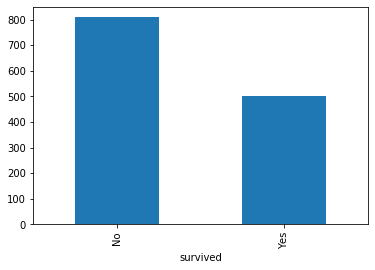

In [160]:
titanic_frame_calc = titanic_frame[['pclass', 'survived', 'sex','age']]
titanic_frame_calc['survived'] = titanic_frame_calc['survived'].map({1: 'Yes', 0: 'No'})
men_women_survive = titanic_frame_calc.groupby('survived').size()

print (men_women_survive)
print(men_women_survive.plot.bar())

As to be expected the number of passengers exceeds the number of those who survived.  We can also look at the age of the passengers across the different classes.  The code is shown below both with the test output and a graph of the output.

sex     pclass  survived
female  First   No          35.200000
                Yes         37.109375
        Second  No          34.090909
                Yes         26.711087
        Third   No          23.418750
                Yes         20.814861
male    First   No          43.658163
                Yes         36.168302
        Second  No          33.092593
                Yes         17.449130
        Third   No          26.679586
                Yes         22.436441
Name: age, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


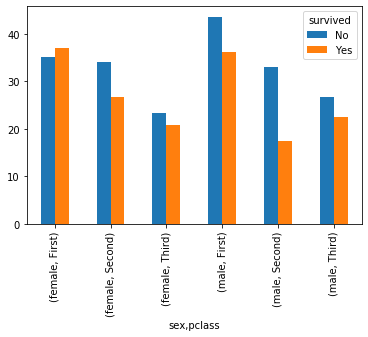

In [161]:
#find the average age

titanic_frame_calc['pclass'] = titanic_frame_calc['pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
print(titanic_frame_calc.groupby(['sex', 'pclass', 'survived']).age.mean())

#Create a bar graph.
print (titanic_frame_calc.groupby(['sex', 'pclass', 'survived']).age.mean().unstack().plot.bar())

## Make a prediction on a few terms.

In this section we will look at whether the class you were is a good prediction of whether you were going to survive.  The code to accomplish that is shown below.

In [162]:
lbl_enc = LabelEncoder()

for col in titanic_frame_calc.columns:
    #Encode the columns with numerics
    titanic_frame_calc[col] = lbl_enc.fit_transform(titanic_frame_calc[col])
    
titanic_dummies_frame = pd.get_dummies(titanic_frame_calc)

feature_cols = ['survived','sex','age']

X = titanic_dummies_frame[feature_cols] 

# Create a subset of the Mush_dummies dataframe for respones
y = titanic_dummies_frame['pclass']

# Instantiate .
knn_titan = KNeighborsClassifier(n_neighbors=1)
knn_titan.fit(X, y)
test2 = knn_titan.predict(X)
print ("Using Kneighbors:" + str(metrics.accuracy_score(y, test2)))

knn_titan = KNeighborsClassifier(n_neighbors=10)
knn_titan.fit(X, y)
test = knn_titan.predict(X)
print ("Using Kneighbors:" + str(metrics.accuracy_score(y, test)))

#Using a logistic regression
logreg_titan = LogisticRegression()
logreg_titan.fit(X,y)

y_pred = logreg_titan.predict(X)

#Classification Accuracy
print ("Using Logistic regression: " + str(metrics.accuracy_score(y, y_pred)))

Using Kneighbors:0.6967150496562261
Using Kneighbors:0.6600458365164248
Using Logistic regression: 0.5637891520244461


Given this outcome you have a slightly better than average chance of predicting whether or not a given passenger will survive.  If we look at a group that was know to have a higher incidence of survival we should see a greater likelihood of selecting a survivor based on sex.  We will look at sex as a predictor.

In [163]:
# Using sex as a predictor
feature_cols = ['survived','pclass','age']

X = titanic_dummies_frame[feature_cols] 

# Create a subset of the Mush_dummies dataframe for respones
y = titanic_dummies_frame['sex']

# Instantiate .
knn_titan = KNeighborsClassifier(n_neighbors=1)
knn_titan.fit(X, y)
test2 = knn_titan.predict(X)
print ("Using Kneighbors:" + str(metrics.accuracy_score(y, test2)))

knn_titan = KNeighborsClassifier(n_neighbors=10)
knn_titan.fit(X, y)
test = knn_titan.predict(X)
print ("Using Kneighbors:" + str(metrics.accuracy_score(y, test)))

#Using a logistic regression
logreg_titan = LogisticRegression()
logreg_titan.fit(X,y)

y_pred = logreg_titan.predict(X)

#Classification Accuracy
print ("Using Logistic regression: " + str(metrics.accuracy_score(y, y_pred)))


Using Kneighbors:0.8074866310160428
Using Kneighbors:0.7708174178762414
Using Logistic regression: 0.7799847211611918


## Conclusion

During the course of this project we were able to derive some vital statistics about the passengers of the Titanic.  We can see that the overall composition of the passengers were male given in the figure psted earlier in the notebook.  We can see that the oldest overall age was found in first class. And we were able to prove through analysis that the majority of Titanic passengers did not survive.  This is in keeping with what is actually known.  

When it comes to making predictions using passenger was only slightly better than average at predicting whether a passenger was to survive.  Based on what I know about Titanic it was said that the first class passengers were able to board long before any other classes.

When using predictions using sex as a predictor of the outcome of survival it offered a slightly better rate of actually getting the right answer.  Which is probably correct.  Based on the rules of loading lifeboats, women and children were the first to load the boats.  Thus ensuring that females were more likely to be saved.

This was a interesting project to pursue. There are other avenues to pursue in analyzing this data set. For example, we can look at the distribution using a scatterplot. 